# UCLA, 170N Final Project
John Parrack, Sam Eisenbach

### Solving Schrödinger's Equation using Finite Difference and Physics Informed Neural Network Algorithms

In the realm of computational physics, solving partial differential equations (PDEs) stands as a cornerstone for understanding complex physical phenomena.This project is designed to delve into this intricate domain by employing two distinct methods: the Finite Difference Method (FDM) and  the Physics-Informed Neural Networs (PINN), both applied to a classic PDE problem. We have chosen the one-dimensional Schrödinger's Equation with a harmonic oscillator potential as our test case.

This equation, fundamental in quantum mechanics, describes how the quantum state of a physical system changes over time. In our case, the simplicity of the quantum harmonic oscillator potential enables us to access an analytical solution, providing a solid ground for comparison and evaluation of two computational approaches we learned during the course.

The project is structured into four parts:

#### 1) Problem Selection and Analytical Solution:
We begin by detailing the one-dimensional Schrödinger's Equation under a simple harmonic oscillator potential. This phase involves presenting the equation, outlining its physical significance, and deriving its analytical solution for a basic configuration. This solution will serve as a benchmark against which our computational results will be compared.

#### 2) Finite Difference Method Implementation:
Next, we implement the Finite Difference Method (FDM) to numerically solve the Schrödinger's Equation. This traditional approach, well-established in numerical analysis, involves approximating derivatives by finite differences.

#### 3) Physics-Informed Neural Networks Implementation: 
We then explore the cutting-edge method of Physics-Informed Neural Networks (PINN). PINN represents a novel wherein deep learning techniques are informed by the underlying physical laws that govern a system, in our case, the Schrödinger's Equation. Given that neural networks can be designed to function as universal approximators, it is possible in principle to obtain the solution to our PDE with arbitrary accuaracy. We will create a neural network and train its output to find and fit the solution to Shrodinger's Equation that we seek.

#### 4) Comparison and Analysis:
This segment is dedicated to comparison of the two computational methods —Finite Difference Method (FDM), and Physics-Informed Neural Networks (PINN)— against the analytical solution of the Schrödinger's Equation.

Key elements of this segment include:
**Accuracy Analysis:** We will assess the precision of both FDM and PINN by comparing their solutions to the analytical solution of the Schrödinger's Equation. This involves a quantitative analysis of the errors and discrepancies between the methods.

**Efficiency Evaluation:** The computational efficiency of both methods will be evaluated in terms of processing time and resource utilization. This analysis can offer insight and help to develop our intuition as to the practicality of each method in different computational environments.

**Methodological Insights:** We will delve into the strengths and limitations of each method. For instance, the robustness of FDM in handling well-defined computational grids versus the flexibility of PINN in dealing with more complex geometries and boundary conditions.

**Theoretical Implications:** This phase will also explore the theoretical implications of our findings, particularly in the context of applying machine learning techniques to physics research.

**Recommendations for Future Research:** Based on our comparative analysis, we will propose potential directions for future study, focusing on improving our methodologies, exploring other PDEs, and integrating other advanced computational techniques.

Upon completion of this project, our goal is to have gained both practical experience and a more profound comprehension of utilizing traditional numerical methods alongside contemporary machine learning techniques for solving differential equations.

----------------------------------------------------------------------

# Problem Selection and Analytical Solution

The analytical solution to the one-dimensional quantum harmonic oscillator can be expressed in terms of Hermite polynomials and Gaussian functions. The time-independent Schrödinger's equation for a harmonic oscillator in one dimension is given by:

$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + \frac{1}{2} m \omega^2 x^2 \psi = E \psi $$

Here, $\psi$ is the wave function, $\hbar$ is the reduced Planck constant, $m$ is the mass of the particle, $\omega$ is the angular frequency of the oscillator, and $E$ is the energy of the state.

The energy eigenvalues for this system are given by:

$$ E_n = \hbar \omega \left(n + \frac{1}{2}\right) $$

where $(n = 0, 1, 2, \ldots)$ is the quantum number.

The corresponding eigenfunctions are:

$$ \psi_n(x) = \left( \frac{m\omega}{\pi \hbar} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\left(\sqrt{\frac{m\omega}{\hbar}} x\right) e^{-\frac{m\omega x^2}{2\hbar}} $$

where $H_n$ is the Hermite polynomial of order $n$.

To represent this solution in code, we can use Python with libraries like `numpy` and `scipy`. The `scipy.special` library has a built-in function for generating Hermite polynomials, `hermite`, which we will employ.

To derive the time-dependent solution $\psi_n(x,t)$ for the quantum harmonic oscillator, we incorporate the time-dependent factor. Solutions $\psi_n(x,t)$ are products of spatial wave functions $\psi_n(x)$ and a time-dependent exponential factor:

$$ \psi_n(x,t) = \left( \frac{m\omega}{\pi \hbar} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\left(\sqrt{\frac{m\omega}{\hbar}} x\right) e^{-\frac{m\omega x^2}{2\hbar}} e^{-\frac{iE_nt}{\hbar}} $$

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp # Here we utilize special.hermite to get the nth hermite polynomial
# For optional use, get physical constants (we use natural units for simplicity)
from scipy.constants import hbar, m_e  # Planck constant and electron mass

# Function to calculate psi_n(x, t) for the nth eigenstate
def psi_n_ana(n, x, t, m=1, omega=1, hbar=1):
    # Energy level
    E_n = hbar * omega * (n + 0.5)
    # Time-dependent factor
    time_factor = np.exp(-1j * E_n * t / hbar)

    # Spatial wave function
    norm_factor = (m * omega / (np.pi * hbar))**0.25 / np.sqrt(2**n * np.math.factorial(n))
    hermite_poly = sp.hermite(n)
    spatial_wave_function = hermite_poly(np.sqrt(m * omega / hbar) * x) * np.exp(-m * omega * x**2 / (2 * hbar))

    return norm_factor * spatial_wave_function * time_factor

##### Plotting Analytical Solution
For quick verification and visualization, we plot the analytical solution for 
the 3rd excited state, $(n = 3)$ for the quantum harmonic oscilator.

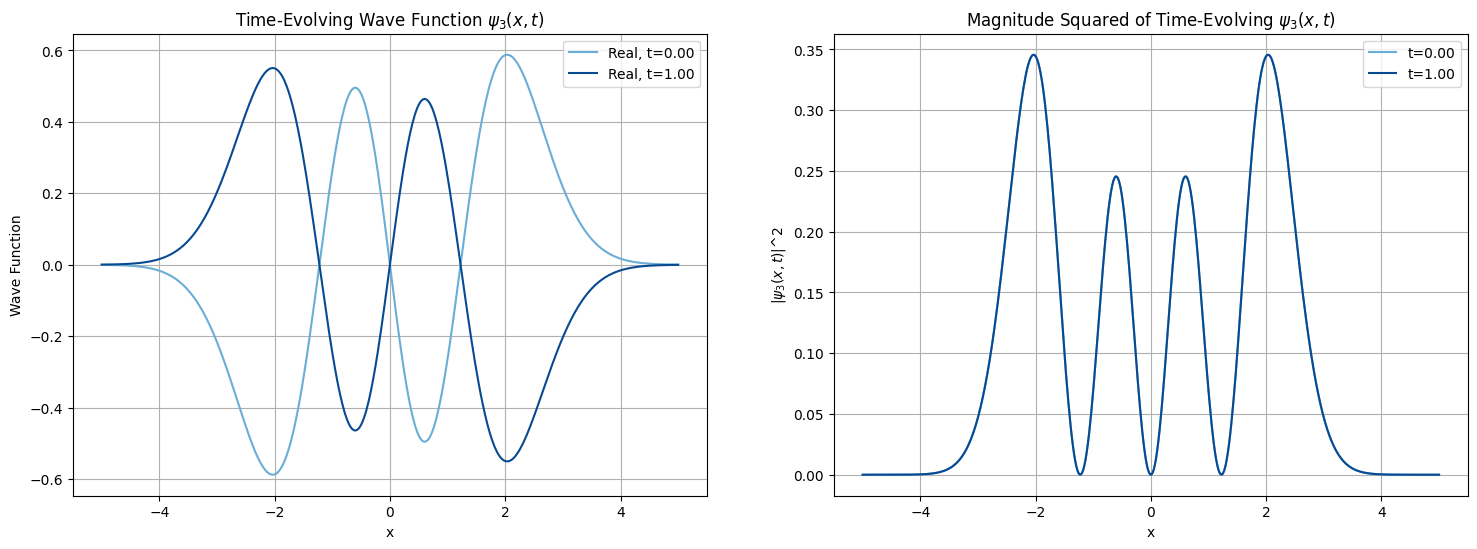

In [54]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# T-values
t_values = np.linspace(0, 1, 2)
# Gradient of greens for different t values
color_gradients = [plt.cm.Blues(i) for i in np.linspace(0.5, 0.9, len(t_values))]

# Plotting for different t values with green gradients
for i, t in enumerate(t_values):
    psi_n = psi_n_ana(n, x, t)

    # First subplot: psi_n(x, t)
    ax1.plot(x, psi_n.real, label=f'Real, t={t:.2f}', color=color_gradients[i])

    # Second subplot: |psi_n(x, t)|^2
    ax2.plot(x, np.abs(psi_n)**2, label=f't={t:.2f}', color=color_gradients[i])

# Formatting the first subplot
ax1.set_title("Time-Evolving Wave Function $\psi_3(x, t)$")
ax1.set_xlabel("x")
ax1.set_ylabel("Wave Function")
ax1.legend()
ax1.grid(True)

# Formatting the second subplot
ax2.set_title("Magnitude Squared of Time-Evolving $\psi_3(x, t)$")
ax2.set_xlabel("x")
ax2.set_ylabel("|$\psi_3(x, t)$|^2")
ax2.legend()
ax2.grid(True)

plt.show()

----------------------------------------------------------------------

# Finite Difference Method Implementation

----------------------------------------------------------------------

# Physics-Informed Neural Networks Implementation

In [ ]:
# Model Construction

class MLP(nn.Module): # MultiLayerPerceptron
    def __init__(self):
        super(MLP, self).__init__()
        # layers
        self.il  = nn.Linear(2,20) # takes 2 inputs and maps to a layer with 50 nodes
        self.hl1 = nn.Linear(20,20) # takes 50 inputs and maps to another layer with 50 nodes
        self.hl2 = nn.Linear(20,20) # ... 
        self.hl3 = nn.Linear(20,20) # ...
        self.ol  = nn.Linear(20,1) # takes 50 inputs and maps to the final layer with 1 node (this network outputs a scalar value)
        # activation functions
        self.tn  = nn.Tanh()
        self.elu  = nn.ELU()

    def forward(self, x, y):
        # setting up the forward model
        u = torch.cat((x, y), 1)
        u = self.il(u)
        u = self.elu(u)
        u = self.hl1(u)
        u = self.elu(u)
        u = self.hl2(u)
        u = self.elu(u)
        u = self.hl3(u)
        u = self.elu(u)
        u = self.ol(u)
        return u

NN_model = MLP()

loss_evol = []
optimizer = optim.Adam(NN_model.parameters(), lr=0.001) 
# Adam is a better optimizer for neural networks than simple gradient descent. It uses the same ideas as gradient descent but, this is more efficient.
# optimizer = optim.SGD(NN_model.parameters(), lr=0.0001)

# hyperparameters
epocs = 1000
n_batches = 10

In [ ]:
# Model Training

for epoc in range(1, epocs+1):
    n_points = X.shape[0]
    idxs_shuffle = np.random.choice(n_points, size = n_points, replace = False)
    for i in range(n_batches):
        # batch of inputs
        X_batch = X[idxs_shuffle[i::n_batches],:]
        Y_batch = Y[idxs_shuffle[i::n_batches],:]
        # batch of target outputs
        F_batch = F[idxs_shuffle[i::n_batches],:]
        
        # batch of predicted outputs
        output_batch = NN_model(X_batch, Y_batch)

        # compute loss between target values and predicted values
        loss = torch.mean(torch.square(output_batch-F_batch))
        # keep track of loss function evolution to check if we are converging
        loss_evol.append(loss.detach().numpy())
        
        # optimize -> 3 steps: 
        # zero the gradients calculated in the previous iteration
        optimizer.zero_grad()
        # compute the new gradients using backward propagation
        loss.backward()
        # update the weights of the NN based on the computed gradients
        optimizer.step()

    if epoc % 100 == 0:
        print('epoc = ', epoc)
        print('loss = ', float(loss))

In [2]:
# Final PINN Output

----------------------------------------------------------------------

# Comparison and Analysis